### Logistic Regression Exercise

In [1]:
# import numpy
import numpy as np

# import linear_model and datasets from sklearn
from sklearn import linear_model, datasets

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [2]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

* print the shape of X

In [3]:
X.shape

(150, 4)

In [4]:
y.shape

(150,)

* print y

In [5]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

* create a logistic regression model
    - **Note:** Spend some time on the logistic regression documentation to get familiar with the available parameters.

In [6]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

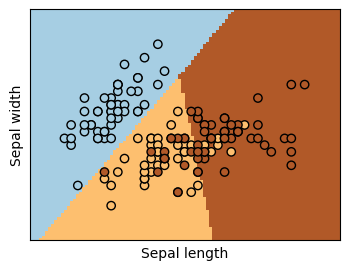

In [7]:
# X = iris.data[:, :2]  # we only take the first two features.
# Y = iris.target

# # Create an instance of Logistic Regression Classifier and fit the data.
# logreg = LogisticRegression(C=1e5)
# logreg.fit(X, Y)

# _, ax = plt.subplots(figsize=(4, 3))
# DecisionBoundaryDisplay.from_estimator(
#     logreg,
#     X,
#     cmap=plt.cm.Paired,
#     ax=ax,
#     response_method="predict",
#     plot_method="pcolormesh",
#     shading="auto",
#     xlabel="Sepal length",
#     ylabel="Sepal width",
#     eps=0.5,
# )

# # Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


# plt.xticks(())
# plt.yticks(())

# plt.show()

* create a regularization space for the **'penalty'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

In [8]:
regularization_space = {
    'penalty': ['l1', 'l2']
}


* create a regularization space for the **'c'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [9]:
regularization_space = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}


* create a hyperparameter options dictionary

In [11]:
hp_options = {
              'penalty': ['l1', 'l2'] ,
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver': ['liblinear', 'saga'],
              'max_iter': [100, 200, 300]}

          

* create a grid search using 5-fold cross validation

In [21]:
# Create the logistic regression model
logistic_regression_model = LogisticRegression()

# Create the GridSearchCV object with the model and hyperparameter options
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=hp_options, cv=5)

# Fit the GridSearchCV object to the data to find the best hyperparameters
grid_search.fit(X, y)



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

* fit the grid search

In [ ]:
# did in cell above

* take the best model from grid search

In [22]:
best_hyperparameters = grid_search.best_params_


* print the best hyperparameters

In [23]:
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'C': 0.1, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga'}


* predict the target vector
    - class ( *predict* )
    - probabilities ( *predict_proba* )

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have loaded and preprocessed the data into X_train, X_test, y_train, and y_test

# Create the logistic regression model with the best hyperparameters found during GridSearchCV
logistic_regression_model = LogisticRegression(**best_hyperparameters)

# Fit the model to the training data with the best hyperparameters
logistic_regression_model.fit(X_train, y_train)

# Predict the target vector for the test data using the trained model
y_pred = logistic_regression_model.predict(X_test)

# Predict the class probabilities for each data point in the test data
# This gives the probability of each data point belonging to each class
# For binary classification, it will give two columns, one for each class (0 and 1)
y_pred_probabilities = logistic_regression_model.predict_proba(X_test)

# Calculate the accuracy of the model's predictions on the test data
accuracy = accuracy_score(y_test, y_pred)

print("Predicted target vector:", y_pred)
print("Class probabilities for each data point in the test data:\n", y_pred_probabilities)
print("Accuracy:", accuracy)


Predicted target vector: [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0]
Class probabilities for each data point in the test data:
 [[0.15087121 0.4463125  0.4028163 ]
 [0.53271907 0.22837077 0.23891016]
 [0.01049598 0.28226723 0.70723679]
 [0.18997637 0.43114801 0.37887562]
 [0.05598611 0.38309768 0.56091621]
 [0.52112297 0.27881072 0.20006631]
 [0.2992059  0.42051802 0.28027608]
 [0.06720954 0.33531644 0.59747402]
 [0.06689659 0.53325091 0.3998525 ]
 [0.19736132 0.47129007 0.3313486 ]
 [0.13441866 0.35916446 0.50641688]
 [0.60510732 0.28206189 0.11283079]
 [0.51546224 0.26885393 0.21568383]
 [0.60326277 0.27413772 0.12259951]
 [0.7389438  0.15437792 0.10667828]
 [0.19424484 0.35322326 0.4525319 ]
 [0.10869162 0.38831615 0.50299223]
 [0.20300605 0.51007575 0.28691821]
 [0.24473562 0.44835039 0.30691399]
 [0.10056918 0.42616899 0.47326182]
 [0.69689629 0.21552441 0.0875793 ]
 [0.18566342 0.41077445 0.40356213]
 [0.6615285  0.2191823  0.1192892 ]
 [0.10056918 0.42616899 0.

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


- plot the ROC curve and print the AUC

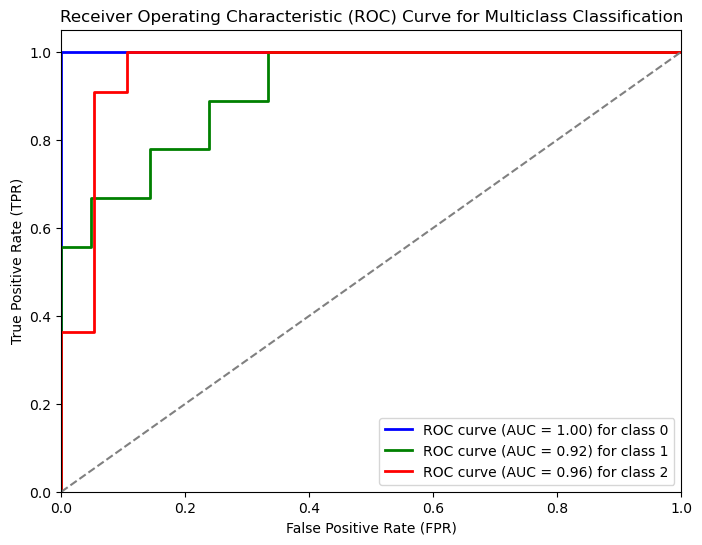

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming you have already trained the model and made predictions (y_pred_probabilities) as shown in the previous example.

# Binarize the true labels (y_test) for multiclass classification
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['b', 'g', 'r'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (AUC = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


* print the Logreg coeficients

In [27]:
# # Print the coefficients (weights) of the logistic regression model

print("Logistic Regression Coefficients:")
print(logistic_regression_model.coef_)

Logistic Regression Coefficients:
[[-1.02905118  0.82690528]
 [ 0.16893967 -0.62551494]
 [ 0.86011152 -0.20139034]]


* print the Logreg intercepts

In [28]:
# represents the bias terms of each class
# Print the intercepts of the logistic regression model
print("Logistic Regression Intercepts:")
print(logistic_regression_model.intercept_)

Logistic Regression Intercepts:
[ 3.27299512  1.11662039 -4.38961551]
